In [2]:
 #detect time series using moving average
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../../data/m21_mem_usage_clean.csv')

In [4]:
data.dropna(inplace=True)
data.head()

,time,machine_id,mem_total,mem_free,mem_usage
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879


In [5]:
data['mem_usage'] = ((data['mem_total'] - data['mem_free'])/data['mem_total']).astype(float)

In [6]:
data.head()

,time,machine_id,mem_total,mem_free,mem_usage
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879


In [7]:
data['time'] = pd.to_datetime(data['time'])

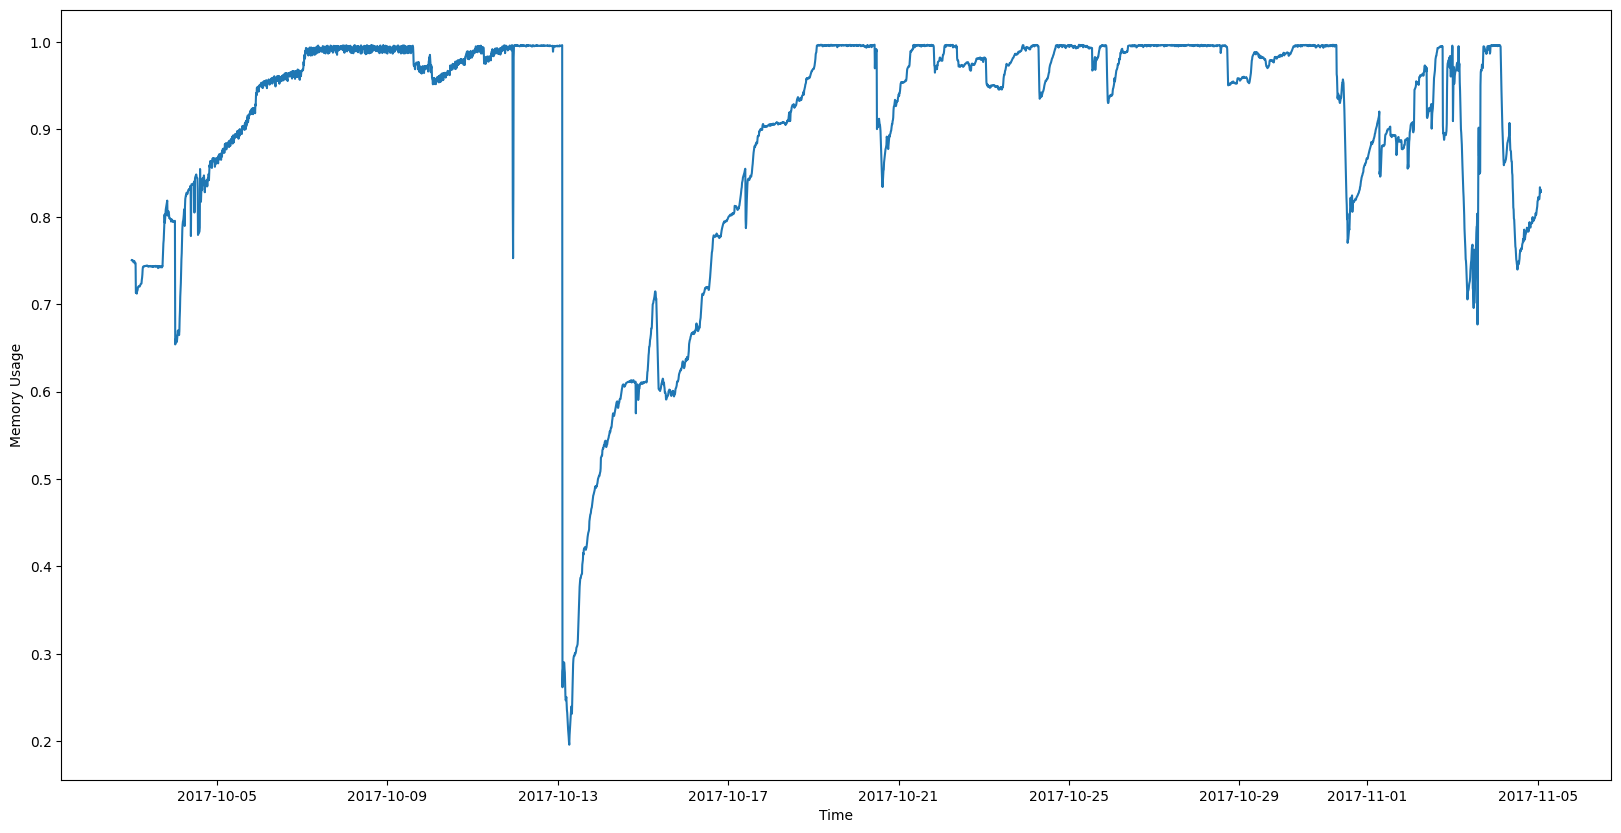

In [8]:
 #plot
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['mem_usage'])
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.show()


In [9]:
#moving average
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [10]:
data['mem_usage_ma'] = moving_average(data['mem_usage'], 10)

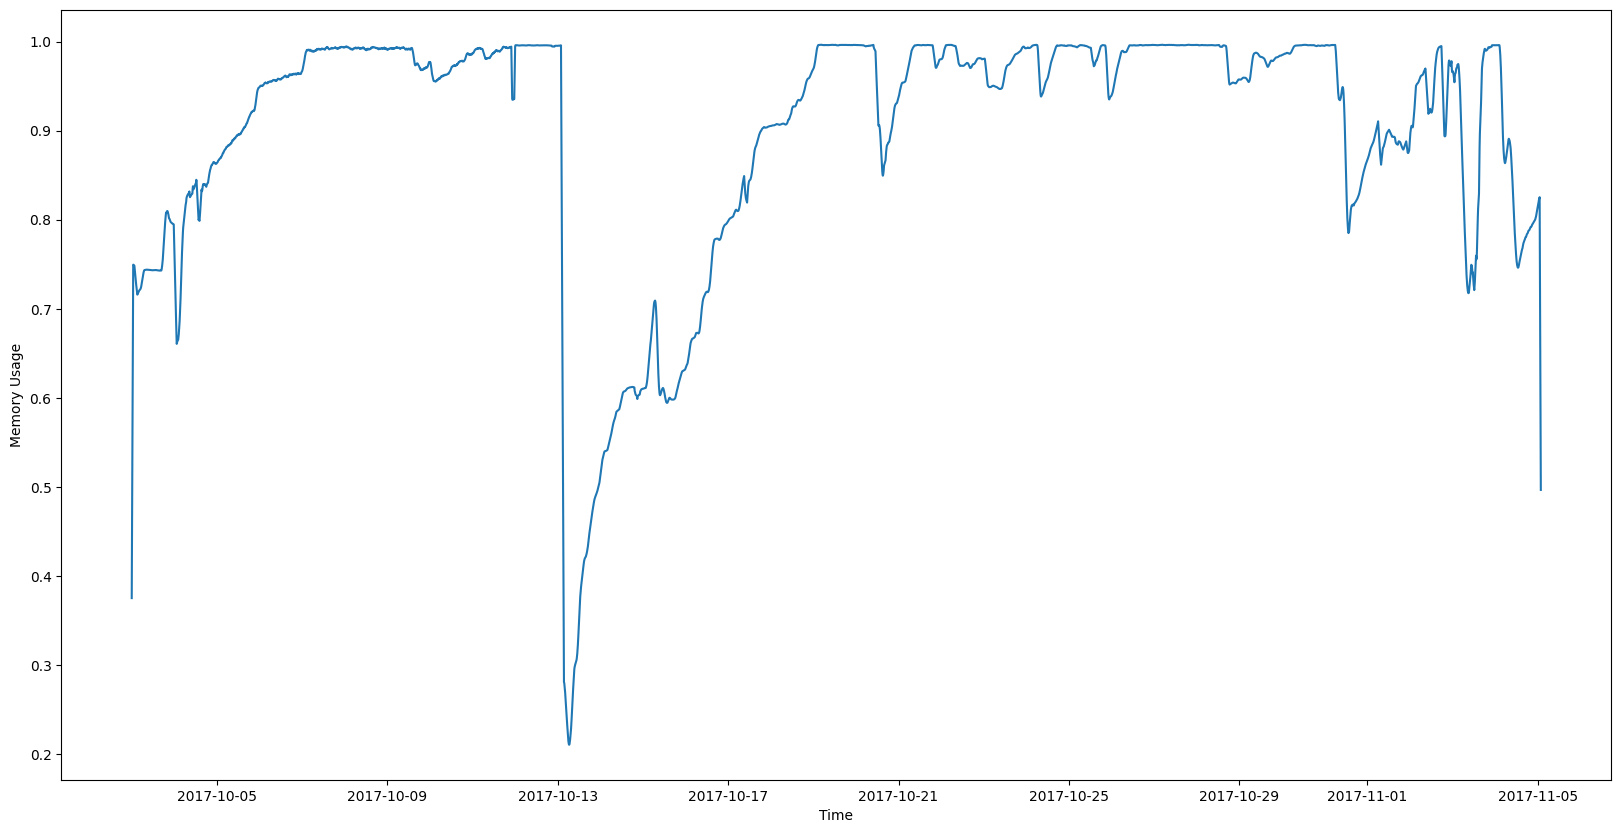

In [11]:
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['mem_usage_ma'])
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.show()


In [12]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [13]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


In [14]:
anomaly = detect_anomaly(data['mem_usage'], 10, 1.5)
anomaly = np.array(anomaly)

In [15]:
#input anomaly to data
data['anomaly'] = 0
data['anomaly'][anomaly] = 1
data.head()

,time,machine_id,mem_total,mem_free,mem_usage,mem_usage_ma,anomaly
0,2017-10-03 00:00:00+00:00,m21,528272672.0,1.319073e+08,0.750305,0.375071,1
1,2017-10-03 00:10:00+00:00,m21,528272672.0,1.320976e+08,0.749944,0.450008,1
2,2017-10-03 00:20:00+00:00,m21,528272672.0,1.319265e+08,0.750268,0.524797,1
3,2017-10-03 00:30:00+00:00,m21,528272672.0,1.319013e+08,0.750316,0.599614,1
4,2017-10-03 00:40:00+00:00,m21,528272672.0,1.321322e+08,0.749879,0.674555,1


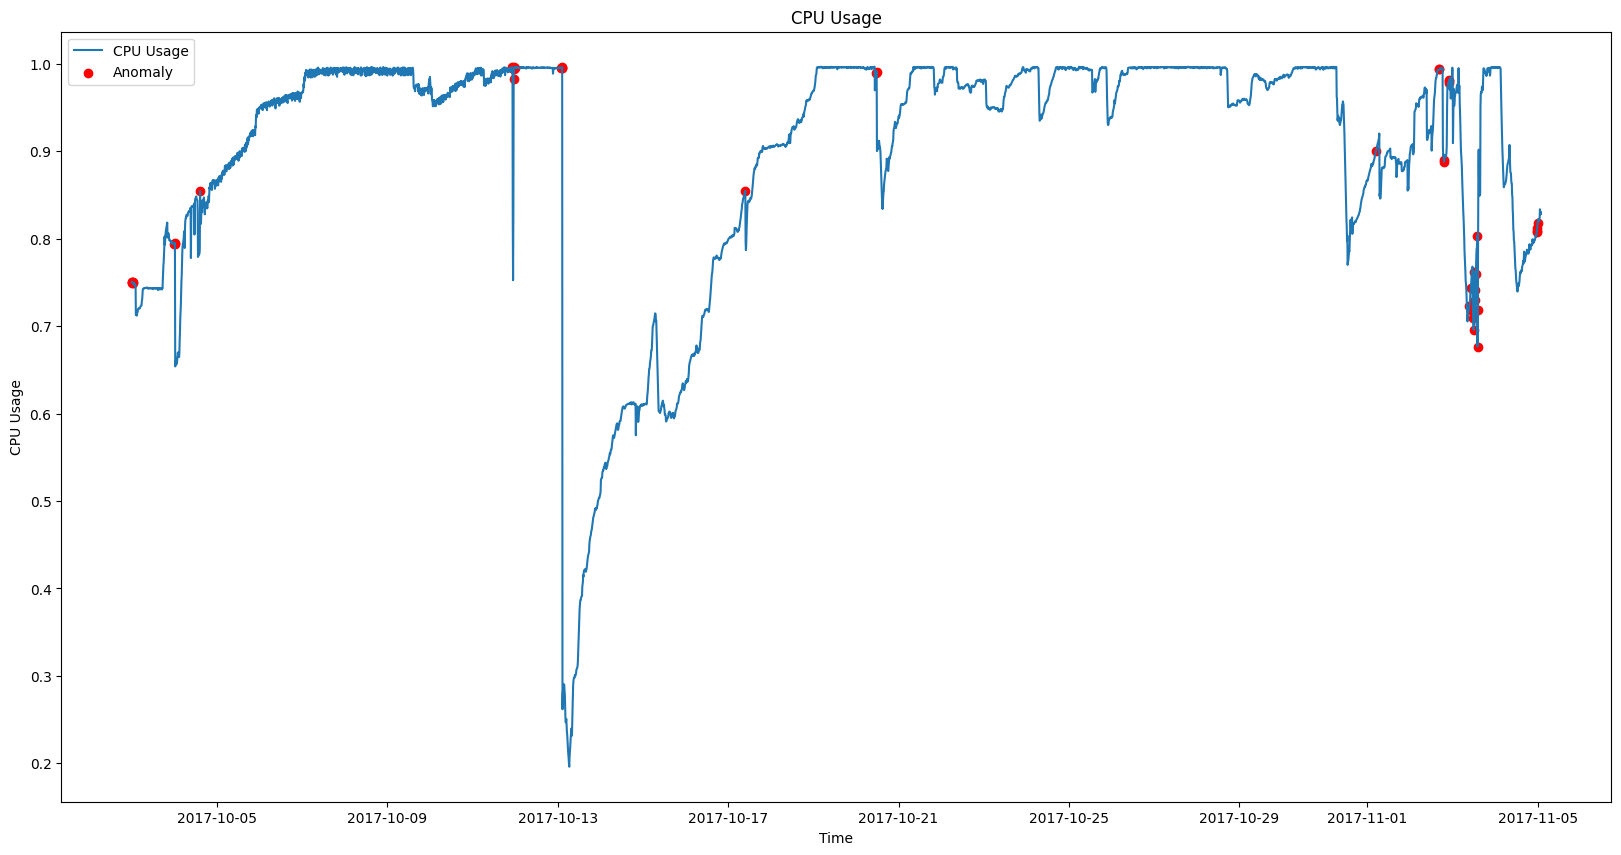

In [16]:
#plot anomaly with anomaly label
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['mem_usage'], label='CPU Usage')
plt.scatter(data['time'][data['anomaly'] == 1], data['mem_usage'][data['anomaly'] == 1], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()
